In [ ]:
# default_exp data

# data

> help function for data exploration and dataset

In [ ]:
#hide
from nbdev.showdoc import *
from bs4 import BeautifulSoup
from argostranslate import package, translate
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
import seaborn as sns
from tqdm import tqdm

In [ ]:
#export
default_translator_path = 'translate-en_de-1_0.argosmodel'
def generate_translator(path='translate-en_de-1_0.argosmodel'):
    '''
        path[str]: path to file from https://www.argosopentech.com/argospm/index/
    '''
    package.install_from_path(path)
    installed_languages = translate.get_installed_languages()
    [str(lang) for lang in installed_languages]
    translation_en_de = installed_languages[0].get_translation(installed_languages[1])
    return translation_en_de

By default it will create English to German translator. 

In [ ]:
#export
def strip_html(text):
    '''
    Remove html text
    '''
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
#export
class OriTraTranslation():
    def __init__(self, ori_text, path=default_translator_path):
        '''
        Input:
            ori_text[str]: Original text
            path[str]: path to file from https://www.argosopentech.com/argospm/index
            
        Output: 
            dict[dict]: { ori_text:Original text, translated_text: translated text }
        '''
        self.ori_text = ori_text
        self.translator = generate_translator(path)

    def __len__(self): return len(self.ori_text)

    def __getitem__(self, idx):
        return {
            'ori_text': self.ori_text[idx], 
            'translated_text' : self.translator.translate(self.ori_text[idx])
        }

**Output:**<br> 
    dict[dict]: { ori_text:Original text, translated_text: translated text }
    

This is useful when you don't want to translate all text but check few text.

```
df = pd.DataFrame({'text': ['Hello world!', 'Welcome to year 2022.', 'Hello Alex, where did you born?']})
ori_translate_text = OriTraTranslation(df['text'], default_translator_path)
print(ori_translate_text[0])
print(ori_translate_text[1])
```
**Output:** <br>
`{'ori_text': 'Hello world!', 'translated_text': 'Hallo Welt!'}`
`{'ori_text': 'Welcome to year 2022.', 'translated_text': 'Willkommen im Jahr 2022.'}`

In [ ]:
#export
class PrettyDataset():
    def __init__(self,*args, **kwargs):
        self.args = args
        self.data = kwargs
    
    def plot_text_length(self, texts, percentile=None):
        '''
        Input:
            texts[list]     : list of text
            percentile[int] : if given it will also provide sentence percentile
        Output:
            seaborn plot
        '''
        if not hasattr(self,texts): return 'Wrong attribute name'
        text_length = [len( text.split() ) for text in getattr(self, texts)]
        if percentile: 
            print('--------------------------------')
            print(f'Text length {percentile} percentile: {round(np.percentile(text_length, percentile))}')
            print('--------------------------------')
        sns.set_style('darkgrid')
        plt.figure(figsize=(15,10))
        plt.xlabel('Sentence length')
        sns.distplot(text_length)
        plt.title('Sentence length vs Density')
        plt.show()
    
    def show_output_examples(self, n):
        '''
        n[int]: Show n examples
        '''
        outs = []
        for idx in range(n):
            out = self.__getitem__(idx)
            outs.append(out)
        if type(outs[0])==dict: 
            df = pd.DataFrame(outs)
            return print_dataframe_table( df, n=n )
        return outs

In [ ]:
#export 
def create_ori_trans_dataframe(text_in, path):
    '''        
    Output: Pandas dataframe: {'text_in': input text, 'trans_text':translated text}
    '''
    ori_sentences = []
    trans_sentences = []
    
    en_de_translation = OriTraTranslation(text_in, path)
    
    for idx in tqdm(range(len(text_in)), desc='Translating text : '):
        en_de = en_de_translation[idx]
        ori_sentences.append(en_de['ori_text'])
        trans_sentences.append(en_de['translated_text'])
    
    df = pd.DataFrame()
    df['ori_text'] = ori_sentences
    df['trans_text'] = trans_sentences
    
    return df

Translate corpus(all text) and return pandas DataFrame with original text and translated text

In [ ]:
#export
def print_dataframe_table(df, n=3, schuffle=True):
    '''
    Randomly see n examples
    '''
    if schuffle: df = df.sample(frac=1).reset_index(drop=True)
    ptable = PrettyTable()
    keys = df.keys().to_list()
    ptable.field_names = df.keys().to_list()
    plist = []
    for idx in range(n):
        l = list()
        for key in keys:
            l.append( df[key][idx] )
        plist.append(l)
    ptable.add_rows(plist)
    
    return ptable

This function is useful when we want to compare long texts. (pandas truncate the long text.)

In [ ]:
#export
def plot_text_length(texts, percentile=None):
    '''
    Takes df['text'] as an input and return `sns.distplot`. 
    '''
    text_length = [len( text.split() ) for text in texts]
    if percentile: 
        print('--------------------------------')
        print(f'Text length {percentile} percentile: {round(np.percentile(text_length, percentile))}')
        print('--------------------------------')
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,10))
    plt.xlabel('Sentence length')
    sns.distplot(text_length)
    plt.title('Sentence length vs Density')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


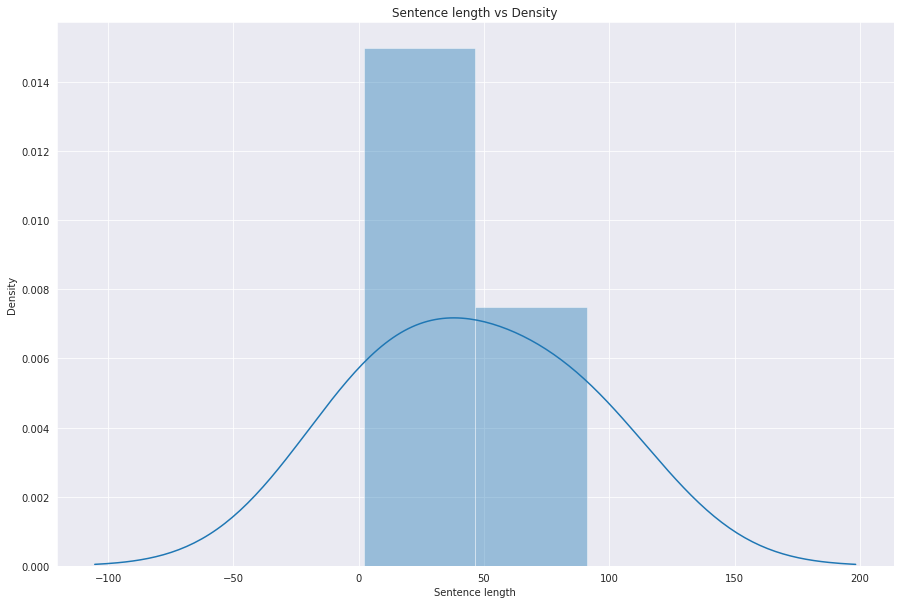

<Figure size 144x144 with 0 Axes>

In [ ]:
#hide
df = pd.DataFrame({'text': ['Hello, world!', "Here's a public example page. You can see on the files tab, there's a model-best.h5. That's automatically saved by default by the Keras integration, but you can save a checkpoint manually and we'll store it for you in association with your run.", "nbdev is a system for exploratory programming. See the nbdev launch post for information about what that means. In practice, programming in this way can feel very different to the kind of programming many of you will be familiar with, since we've mainly be taught coding techniques that are (at least implicitly) tied to the underlying tools we have access to. I've found that programming in a 'notebook first' way can make me 2-3x more productive than I was before (when we used vscode, Visual Studio, vim, PyCharm, and similar tools)."]})
plot_text_length(df['text'])